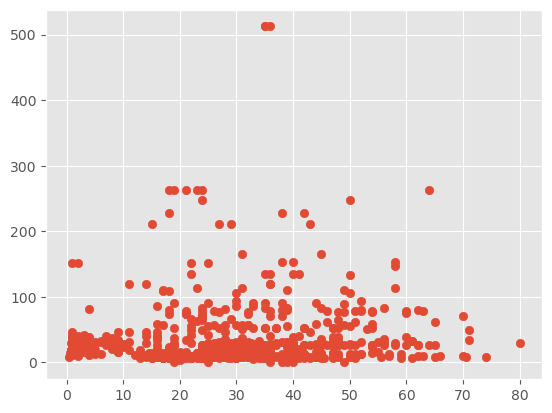

shape: (9, 13)
┌────────────┬─────────────┬──────────┬──────────┬───┬───────────┬───────────┬───────┬──────────┐
│ statistic  ┆ PassengerId ┆ Survived ┆ Pclass   ┆ … ┆ Ticket    ┆ Fare      ┆ Cabin ┆ Embarked │
│ ---        ┆ ---         ┆ ---      ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---   ┆ ---      │
│ str        ┆ f64         ┆ f64      ┆ f64      ┆   ┆ str       ┆ f64       ┆ str   ┆ str      │
╞════════════╪═════════════╪══════════╪══════════╪═══╪═══════════╪═══════════╪═══════╪══════════╡
│ count      ┆ 891.0       ┆ 891.0    ┆ 891.0    ┆ … ┆ 891       ┆ 891.0     ┆ 204   ┆ 889      │
│ null_count ┆ 0.0         ┆ 0.0      ┆ 0.0      ┆ … ┆ 0         ┆ 0.0       ┆ 687   ┆ 2        │
│ mean       ┆ 446.0       ┆ 0.383838 ┆ 2.308642 ┆ … ┆ null      ┆ 32.204208 ┆ null  ┆ null     │
│ std        ┆ 257.353842  ┆ 0.486592 ┆ 0.836071 ┆ … ┆ null      ┆ 49.693429 ┆ null  ┆ null     │
│ min        ┆ 1.0         ┆ 0.0      ┆ 1.0      ┆ … ┆ 110152    ┆ 0.0       ┆ A10   ┆ C        │
│ 25%

In [6]:
'''
Generate a scatterplot of age vs fare paid for passengers in the Titanic data.  Ensure you label each axis appropriately.  You have been supplied with the Titanic data .csv again for this session.  It’s recommended you read the data into a Pandas DataFrame.
Generate a histogram of ages for passengers in the Titanic data with 50 bins.  You’ll need to look at the MatPlotLib information on how to generate a Histogram.  You should look in the “Examples” section for (plain) histograms.  The example given will plot a histogram of random samples from a Normal Distribution, and will also have two plots in one figure.  You don’t need either of these things, so just pick out what you need from the example.  Label each axis appropriately.
You have been supplied with a file named meds_used_per_day.csv, which contains the results from a simulation model.  Specifically, it lists the total number of medications used across a palliative nursing team per day for 28 days for 3 runs (repeats) of the simulation.  Plot a line graph with three plots (one for each run of the simulation), plotting day number (1-28) on the x-axis against total medications used on the y-axis.  Label each axis appropriately.  Each line should be a different colour and a different style to the other lines (don’t forget to consult the cheatsheets here : https://matplotlib.org/cheatsheets/).  You should also include a legend that should be located in the top right corner of the plot.

If you manage to finish all this, and nobody needs any help, generate some further plots of your choosing from the Titanic data.
'''



import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import polars as pl



q = (
    pl.scan_csv("iris.csv")
    .filter(pl.col("sepal.length") > 5)
    .group_by("variety")
    .agg(pl.all().sum())
)

iris_df = q.collect()

r=  pl.scan_csv("iris.csv")


plt.style.use('ggplot')

os.chdir("/home/luke/Documents/HSMA/h6_1g_python_part_3-main/1g_python_programming_part_3/")

p_df = pl.scan_csv("titanic_dataset.csv").collect()


base_df = pd.read_csv("titanic_dataset.csv")

df = base_df[["Age", "Fare"]]

# plot
fig, ax = plt.subplots()

ax.scatter(base_df["Age"], base_df["Fare"])


plt.show()
print(p_df.describe())

print(iris_df)
print(q)

print(r.collect().describe())

# Histogram

In [ ]:

ages = base_df["Age"]

# plot:
fig, ax = plt.subplots()

ax.hist(ages, bins=50)

plt.show()


In [ ]:


df = base_df.query('Sex=="male"')

colors = df['Survived'].map({0: 'r', 1: 'b'}) # ok for scatter

df_survived = df[df['Survived'] == 1]
df_didnt_survive = df[df['Survived'] == 0]

# Create a histogram for survivors
ax = df_survived['Age'].plot(kind='hist',
                             bins=20,
                             alpha=0.3,
                             label='Survived',
                             color='b', 
                             title="Males"
                             )

# Add a histogram for non-survivors to the same axes
df_didnt_survive['Age'].plot(kind='hist',
                             bins=20,
                             alpha=0.3,
                             label='Did not survive',
                             ax=ax,
                             color='r'                         
                             )

plt.legend()
plt.show()


df = base_df.query('Sex=="female"')
df_survived = df[df['Survived'] == 1]
df_didnt_survive = df[df['Survived'] == 0]

# Create a histogram for survivors
ax = df_survived['Age'].plot(kind='hist',
                             bins=20,
                             alpha=0.3,
                             label='Survived',
                             color='b', 
                             title="Females"
                             )

# Add a histogram for non-survivors to the same axes
df_didnt_survive['Age'].plot(kind='hist',
                             bins=20,
                             alpha=0.3,
                             label='Did not survive',
                             ax=ax,
                             color='r'                         
                             )

plt.legend()
plt.show()

# Medications

Plot a line graph with three plots (one for each run of the simulation), plotting day number (1-28) on the x-axis against total medications used on the y-axis.  Label each axis appropriately.  Each line should be a different colour and a different style to the other lines (don’t forget to consult the cheatsheets here : https://matplotlib.org/cheatsheets/).  You should also include a legend that should be located in the top right corner of the plot.


In [ ]:
os.chdir("/home/luke/Documents/HSMA/h6_1g_python_part_3-main/1g_python_programming_part_3/")

df = pd.read_csv("meds_used_per_day.csv")

'''
print(df)
print(df.head())
print(df.tail())
print(df.describe())
print(df.info())
print(df.columns)
print(df["Run 1"])
'''

y1 = df["Run 1"]
y2 = df["Run 2"]
y3 = df["Run 3"]

figure, axs = plt.subplots()
axs.set_xlabel("Days")
axs.set_ylabel("Number of medications")


axs.plot(y1, color="g", linestyle=":", label = "Run 1")
axs.plot(y2, color="b", linestyle="-.", label = "Run 2")
axs.plot(y3, color="r", linestyle="--", label = "Run 3")

axs.legend(loc="upper right")


Violin Plot

In [ ]:

df_survived_male = base_df.query('"Survived" == 1 & Sex == "male"')
df_survived_female = base_df.query('Survived == 1 & Sex == "female"')
df_died_female = base_df.query('Survived == 0 & Sex == "female"')
df_died_male = base_df.query('Survived == 0 & Sex == "male"')


colors = df['Survived'].map({0: 'r', 1: 'b'}) # ok for scatter

df_survived = df[df['Survived'] == 1]
df_didnt_survive = df[df['Survived'] == 0]


fig, ax = plt.subplots()

vp = ax.violinplot(df_died_male, 
                   showmeans=False, showmedians=False, showextrema=False)
# styling:
for body in vp['bodies']:
    body.set_alpha(0.9)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()


# Plotnine

In [ ]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point()
    + stat_smooth(method="lm")
    + facet_wrap("gear")
)

In [ ]:
from plotnine import ggplot, geom_point, aes, scale_color_brewer, facet_wrap, geom_histogram
from plotnine.data import mtcars

print(base_df)

(
    ggplot(base_df, aes("Age", fill="factor(Sex)"))
    + geom_histogram()
#    + stat_smooth(method="lm")
    + facet_wrap(["Survived"])
    + scale_color_brewer()
)

# Trying polars - problems with import pyarrow

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl


url = "https://theunitedstates.io/congress-legislators/legislators-historical.csv"

dtypes = {
    "first_name": pl.Categorical,
    "gender": pl.Categorical,
    "type": pl.Categorical,
    "state": pl.Categorical,
    "party": pl.Categorical,
}

dataset = pl.read_csv(url, dtypes=dtypes).with_columns(
    pl.col("birthday").str.to_date(strict=False)
)


q = (
    dataset.lazy()
    .group_by("first_name")
    .agg(
        pl.len(),
        pl.col("gender"),
        pl.first("last_name"),
    )
    .sort("len", descending=True)
#    .limit(5)
)

df = q.collect()
print(df)

q = (
    dataset.lazy()
    .group_by("state")
    .agg(
        (pl.col("party") == "Anti-Administration").sum().alias("anti"),
        (pl.col("party") == "Pro-Administration").sum().alias("pro"),
    )
    .sort("pro", descending=True)
#    .limit(5)
)

df = q.collect()
print(df)

q = (
    dataset.lazy()
    .group_by("state", "party")
    .agg(pl.count("party").alias("count"))
    .filter(
        (pl.col("party") == "Anti-Administration")
        | (pl.col("party") == "Pro-Administration")
    )
    .sort("count", descending=True)
    .limit(5)
)

df = q.collect()
print(df)

shape: (1_584, 4)
┌────────────┬──────┬───────────────────┬───────────┐
│ first_name ┆ len  ┆ gender            ┆ last_name │
│ ---        ┆ ---  ┆ ---               ┆ ---       │
│ cat        ┆ u32  ┆ list[cat]         ┆ str       │
╞════════════╪══════╪═══════════════════╪═══════════╡
│ John       ┆ 1256 ┆ ["M", "M", … "M"] ┆ Walker    │
│ William    ┆ 1022 ┆ ["M", "M", … "M"] ┆ Few       │
│ James      ┆ 714  ┆ ["M", "M", … "M"] ┆ Armstrong │
│ Thomas     ┆ 453  ┆ ["M", "M", … "M"] ┆ Tucker    │
│ Charles    ┆ 439  ┆ ["M", "M", … "M"] ┆ Carroll   │
│ …          ┆ …    ┆ …                 ┆ …         │
│ Lane       ┆ 1    ┆ ["M"]             ┆ Evans     │
│ Isidore    ┆ 1    ┆ ["M"]             ┆ Dollinger │
│ Joaquin    ┆ 1    ┆ ["M"]             ┆ Elizalde  │
│ Marc       ┆ 1    ┆ ["M"]             ┆ Marks     │
│ Ely        ┆ 1    ┆ ["M"]             ┆ Moore     │
└────────────┴──────┴───────────────────┴───────────┘
shape: (58, 3)
┌───────┬──────┬─────┐
│ state ┆ anti ┆ pro │
│ -

In [5]:


dataset.describe()
dataset.head()
ds = dataset.to_pandas()



In [12]:
from datetime import date


def compute_age():
    return date.today().year - pl.col("birthday").dt.year()


def avg_birthday(gender: str) -> pl.Expr:
    return (
        compute_age()
        .filter(pl.col("gender") == gender)
        .mean()
        .alias(f"avg {gender} birthday")
    )


q = (
    dataset.lazy()
    .group_by("state")
    .agg(
        avg_birthday("M"),
        avg_birthday("F"),
        (pl.col("gender") == "M").sum().alias("# male"),
        (pl.col("gender") == "F").sum().alias("# female"),
    )
    .limit(5)
)

df = q.collect()
print(df)


def get_person() -> pl.Expr:
    return pl.col("first_name") + pl.lit(" ") + pl.col("last_name")


q = (
    dataset.lazy()
    .sort("birthday", descending=True)
    .group_by("state")
    .agg(
        get_person().first().alias("youngest"),
        get_person().last().alias("oldest"),
    )
    .limit(5)
)

df = q.collect()
print(df)

shape: (5, 5)
┌───────┬────────────────┬────────────────┬────────┬──────────┐
│ state ┆ avg M birthday ┆ avg F birthday ┆ # male ┆ # female │
│ ---   ┆ ---            ┆ ---            ┆ ---    ┆ ---      │
│ cat   ┆ f64            ┆ f64            ┆ u32    ┆ u32      │
╞═══════╪════════════════╪════════════════╪════════╪══════════╡
│ DE    ┆ 184.593407     ┆ null           ┆ 97     ┆ 0        │
│ VA    ┆ 194.542781     ┆ 68.2           ┆ 430    ┆ 5        │
│ UT    ┆ 127.730769     ┆ 82.0           ┆ 52     ┆ 4        │
│ KS    ┆ 151.397059     ┆ 88.714286      ┆ 136    ┆ 7        │
│ OH    ┆ 174.672414     ┆ 82.444444      ┆ 673    ┆ 9        │
└───────┴────────────────┴────────────────┴────────┴──────────┘


# Polars window functions

In [13]:
import polars as pl

# then let's load some csv data with information about pokemon
df = pl.read_csv(
    "https://gist.githubusercontent.com/ritchie46/cac6b337ea52281aa23c049250a4ff03/raw/89a957ff3919d90e6ef2d34235e6bf22304f3366/pokemon.csv"
)
print(df.head())

shape: (5, 13)
┌─────┬───────────────────────┬────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                  ┆ Type 1 ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                   ┆ ---    ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                   ┆ str    ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═══════════════════════╪════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur             ┆ Grass  ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur               ┆ Grass  ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur              ┆ Grass  ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 3   ┆ VenusaurMega Venusaur ┆ Grass  ┆ Poison ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander            ┆ Fire   ┆ null   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
└─────┴────────

## .over syntax     

In [18]:
out = df.select(
    "Name",
    "Type 1",
    "Type 2",
    "Generation",
    pl.col("Attack").mean().over("Type 1").alias("avg_attack_by_type"),
    pl.col("Defense")
    .mean()
    .over(["Type 1", "Type 2"])
    .alias("avg_defense_by_type_combination"),
    pl.col("Attack").mean().alias("avg_attack"),
).sort(["avg_attack_by_type", "Generation"], descending=True)
print(out)

shape: (163, 7)
┌────────────┬──────────┬────────┬────────────┬───────────────────┬───────────────────┬────────────┐
│ Name       ┆ Type 1   ┆ Type 2 ┆ Generation ┆ avg_attack_by_typ ┆ avg_defense_by_ty ┆ avg_attack │
│ ---        ┆ ---      ┆ ---    ┆ ---        ┆ e                 ┆ pe_combinatio…    ┆ ---        │
│ str        ┆ str      ┆ str    ┆ i64        ┆ ---               ┆ ---               ┆ f64        │
│            ┆          ┆        ┆            ┆ f64               ┆ f64               ┆            │
╞════════════╪══════════╪════════╪════════════╪═══════════════════╪═══════════════════╪════════════╡
│ Machop     ┆ Fighting ┆ null   ┆ 1          ┆ 102.857143        ┆ 61.0              ┆ 75.349693  │
│ Machamp    ┆ Fighting ┆ null   ┆ 1          ┆ 102.857143        ┆ 61.0              ┆ 75.349693  │
│ Machoke    ┆ Fighting ┆ null   ┆ 1          ┆ 102.857143        ┆ 61.0              ┆ 75.349693  │
│ Primeape   ┆ Fighting ┆ null   ┆ 1          ┆ 102.857143        ┆ 61.0   

## polars: folds

powerful iterators over a df or part of a df. 

In [35]:

df = pl.DataFrame({"a": [2, 1, 3], "b": [1, 2, 3], "c": [1.0, 2.0, 3.0]})

df.fold(lambda x, y: x.zip_with(y < x, y))
 

 


a
f64
2.0
2.0
3.0


## .zip_with
this is tricky!

The lambda takes x, y which will iterate over the columns,
 ```zip_with``` is a method that will take two values and replace with one:
 the one chosen is self (ie x) if the conditional is True and the alternative
 if the condition if False. 
 

In [37]:
df = pl.DataFrame( { "a": [1, 2, 3], "b": [10, 20, 30], } )

out = df.select( pl.fold(acc=pl.lit(0), 
                         function=lambda acc, x: acc + x, 
                         exprs=pl.all())
                         .alias( "sum" ), ) 
print(out)

shape: (3, 1)
┌─────┐
│ sum │
│ --- │
│ i64 │
╞═════╡
│ 11  │
│ 22  │
│ 33  │
└─────┘


### Explanation

This code creates a DataFrame using the Polars library in Python and then applies a fold operation to it to compute the sum of all elements in the DataFrame.

Here's a step-by-step explanation:

1. `pl.DataFrame({"a": [1, 2, 3], "b": [10, 20, 30]})` creates a DataFrame with two columns: 'a' and 'b'. The values in each column are given by the lists `[1, 2, 3]` and `[10, 20, 30]`, respectively.

2. `df.select(pl.fold(acc=pl.lit(0), function=lambda acc, x: acc + x, exprs=pl.all()).alias("sum"))` applies a fold operation to the DataFrame. The fold operation takes an accumulator (initial value), a binary function (a function that takes two arguments), and a list of expressions (columns in this case), and applies the function to the accumulator and each element of the columns in a cumulative way.

3. The accumulator is `pl.lit(0)`, which is a literal value of 0. This is the initial value for the fold operation.

4. The binary function is `lambda acc, x: acc + x`. This function takes the accumulator `acc` and a Series `x` and returns a new accumulator. The new accumulator is the sum of the old accumulator and the Series `x`.

5. The expressions are `pl.all()`, which is a list of all columns in the DataFrame. The fold operation will be applied to each column in turn.

6. The `alias("sum")` method renames the result of the fold operation to 'sum'.

7. The `select` method selects the result of the fold operation as a new DataFrame.

8. `print(out)` prints the resulting DataFrame.

So, the overall effect of this code is to create a DataFrame that contains the sum of all elements in the original DataFrame. The sum is computed column by column, and the results are added up. The final result is a DataFrame with a single row and a single column named 'sum'.

## concat_string
More efficient than folds for string concatenation.


In [39]:
df = pl.DataFrame(
    {
        "a": ["a", "b", "c"],
        "b": [1, 2, 3],
    }
)

out = df.select(pl.concat_str(["a", pl.lit("_"),"b"]))
print(out)

shape: (3, 1)
┌─────┐
│ a   │
│ --- │
│ str │
╞═════╡
│ a_1 │
│ b_2 │
│ c_3 │
└─────┘


## polars: lists


In [40]:
weather = pl.DataFrame(
    {
        "station": ["Station " + str(x) for x in range(1, 6)],
        "temperatures": [
            "20 5 5 E1 7 13 19 9 6 20",
            "18 8 16 11 23 E2 8 E2 E2 E2 90 70 40",
            "19 24 E9 16 6 12 10 22",
            "E2 E0 15 7 8 10 E1 24 17 13 6",
            "14 8 E0 16 22 24 E1",
        ],
    }
)
print(weather)

shape: (5, 2)
┌───────────┬─────────────────────────────────┐
│ station   ┆ temperatures                    │
│ ---       ┆ ---                             │
│ str       ┆ str                             │
╞═══════════╪═════════════════════════════════╡
│ Station 1 ┆ 20 5 5 E1 7 13 19 9 6 20        │
│ Station 2 ┆ 18 8 16 11 23 E2 8 E2 E2 E2 90… │
│ Station 3 ┆ 19 24 E9 16 6 12 10 22          │
│ Station 4 ┆ E2 E0 15 7 8 10 E1 24 17 13 6   │
│ Station 5 ┆ 14 8 E0 16 22 24 E1             │
└───────────┴─────────────────────────────────┘


In [41]:
out = weather.with_columns(pl.col("temperatures").str.split(" "))
print(out)


shape: (5, 2)
┌───────────┬──────────────────────┐
│ station   ┆ temperatures         │
│ ---       ┆ ---                  │
│ str       ┆ list[str]            │
╞═══════════╪══════════════════════╡
│ Station 1 ┆ ["20", "5", … "20"]  │
│ Station 2 ┆ ["18", "8", … "40"]  │
│ Station 3 ┆ ["19", "24", … "22"] │
│ Station 4 ┆ ["E2", "E0", … "6"]  │
│ Station 5 ┆ ["14", "8", … "E1"]  │
└───────────┴──────────────────────┘


One way we could go post this would be to convert each temperature measurement into its own row:

In [43]:
out = weather.with_columns(pl.col("temperatures").str.split(" ")).explode(
    "temperatures"
)
print(out)


shape: (49, 2)
┌───────────┬──────────────┐
│ station   ┆ temperatures │
│ ---       ┆ ---          │
│ str       ┆ str          │
╞═══════════╪══════════════╡
│ Station 1 ┆ 20           │
│ Station 1 ┆ 5            │
│ Station 1 ┆ 5            │
│ Station 1 ┆ E1           │
│ Station 1 ┆ 7            │
│ …         ┆ …            │
│ Station 5 ┆ E0           │
│ Station 5 ┆ 16           │
│ Station 5 ┆ 22           │
│ Station 5 ┆ 24           │
│ Station 5 ┆ E1           │
└───────────┴──────────────┘


However, in Polars, we often do not need to do this to operate on the List elements.
Operating on List columns

Polars provides several standard operations on List columns. If we want the first three measurements, we can do a head(3). The last three can be obtained via a tail(3), or alternately, via slice (negative indexing is supported). We can also identify the number of observations via lengths. Let's see them in action:



In [44]:
out = weather.with_columns(pl.col("temperatures").str.split(" ")).with_columns(
    pl.col("temperatures").list.head(3).alias("top3"),
    pl.col("temperatures").list.slice(-3, 3).alias("bottom_3"),
    pl.col("temperatures").list.len().alias("obs"),
)
print(out)

shape: (5, 5)
┌───────────┬──────────────────────┬────────────────────┬────────────────────┬─────┐
│ station   ┆ temperatures         ┆ top3               ┆ bottom_3           ┆ obs │
│ ---       ┆ ---                  ┆ ---                ┆ ---                ┆ --- │
│ str       ┆ list[str]            ┆ list[str]          ┆ list[str]          ┆ u32 │
╞═══════════╪══════════════════════╪════════════════════╪════════════════════╪═════╡
│ Station 1 ┆ ["20", "5", … "20"]  ┆ ["20", "5", "5"]   ┆ ["9", "6", "20"]   ┆ 10  │
│ Station 2 ┆ ["18", "8", … "40"]  ┆ ["18", "8", "16"]  ┆ ["90", "70", "40"] ┆ 13  │
│ Station 3 ┆ ["19", "24", … "22"] ┆ ["19", "24", "E9"] ┆ ["12", "10", "22"] ┆ 8   │
│ Station 4 ┆ ["E2", "E0", … "6"]  ┆ ["E2", "E0", "15"] ┆ ["17", "13", "6"]  ┆ 11  │
│ Station 5 ┆ ["14", "8", … "E1"]  ┆ ["14", "8", "E0"]  ┆ ["22", "24", "E1"] ┆ 7   │
└───────────┴──────────────────────┴────────────────────┴────────────────────┴─────┘
